## Checking Varaince Scheduler

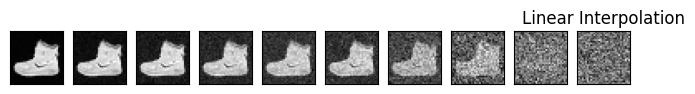

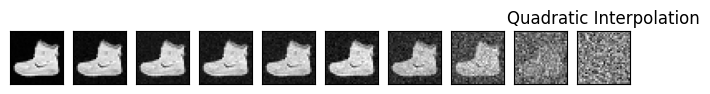

In [6]:
import torch

import matplotlib.pyplot as plt

from main import load_data
from models import VarianceScheduler


# define the configurations of the Variance Scheduler
beta1 = 0.0001
beta2 = 0.02
num_steps = 1000
interpolation = 'linear'

# sample data
dataset = load_data()
sample_image = dataset[0][0].unsqueeze(0)

time_steps = torch.tensor([0, 10, 20, 30, 40, 50, 100, 200, 500, 999], dtype=torch.long)
sample_image = sample_image.repeat(10, 1, 1, 1)

# define the variance scheduler with linear interpolation
var_scheduler = VarianceScheduler(beta_start=beta1, beta_end=beta2, num_steps=num_steps, interpolation=interpolation)

noisy_samples, _ = var_scheduler.add_noise(sample_image, time_steps)

fig, ax = plt.subplots(1, 10)
fig.set_size_inches(8, 2)
for i in range(10):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].imshow(noisy_samples[i, 0].numpy(), cmap='gray')

plt.title('Linear Interpolation')
plt.show()


# define the variance scheduler with quadratic interpolation
interpolation = 'quadratic'
var_scheduler = VarianceScheduler(beta_start=beta1, beta_end=beta2, num_steps=num_steps, interpolation=interpolation)

noisy_samples, _ = var_scheduler.add_noise(sample_image, time_steps)

fig, ax = plt.subplots(1, 10)
fig.set_size_inches(8, 2)
for i in range(10):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].imshow(noisy_samples[i, 0].numpy(), cmap='gray')

plt.title('Quadratic Interpolation')
plt.show()

## Training DDPM

In [ ]:
!python main.py --model ddpm --mode train

## DDPM Image Generation

saves the results in your project directory as "DDPM_generated_samples.png"

In [7]:
!python main.py --model ddpm --mode generate



	 Generating images using DDPM ...
Predictions: tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 4, 2, 2, 2, 2, 3, 3, 4, 3, 3, 4, 4, 4, 6,
        4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 0, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 7, 9,
        9, 5], device='cuda:0')
Ground Truth: tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4,
        4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9,
        9, 9], device='cuda:0')


	 Generated images saved!
Accuracy: 88.00%	 Score: 1.00


## Trainin DDIM

In [ ]:
!python main.py --model ddim --mode train

## DDIM Image Generation

saves the results in your project directory as "DDIM_generated_samples.png"

In [8]:
!python main.py --model ddim --mode generate



	 Generating images using DDIM ...
Predictions: tensor([6, 6, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4,
        4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9,
        9, 9], device='cuda:0')
Ground Truth: tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4,
        4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9,
        9, 9], device='cuda:0')


	 Generated images saved!
Accuracy: 96.00%	 Score: 1.00


## Training VAE

In [ ]:
!python main.py --model vae --mode train

## VAE Image Generation

saves the results in your project directory as "VAE_generated_samples.png"

In [9]:
!python main.py --model vae --mode generate



	 Generating images using VAE ...
Predictions: tensor([0, 0, 0, 0, 6, 1, 1, 1, 1, 1, 6, 2, 4, 2, 2, 3, 3, 3, 3, 3, 6, 4, 4, 4,
        4, 9, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 9, 8, 8, 8, 8, 8, 9, 9, 9,
        9, 9], device='cuda:0')
Ground Truth: tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4,
        4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9,
        9, 9], device='cuda:0')


	 Generated images saved!
Accuracy: 88.00%	 Score: 1.00
